In [12]:
# %%capture
# %run final_chars_classification.ipynb



In [13]:
%run table_detector.ipynb

In [14]:
%run final_functions.ipynb

In [15]:
%run preprocessing.ipynb

In [16]:
%run get_rows_number.ipynb

./all_symbols/ 0
./all_symbols/( 70
./all_symbols/) 84
./all_symbols/+ 73
./all_symbols/A 76
./all_symbols/B 65
./all_symbols/C 79
./all_symbols/D 76
./all_symbols/E 71
./all_symbols/F 78
./all_symbols/implies 69
./all_symbols/xor 70
./all_symbols/~ 69


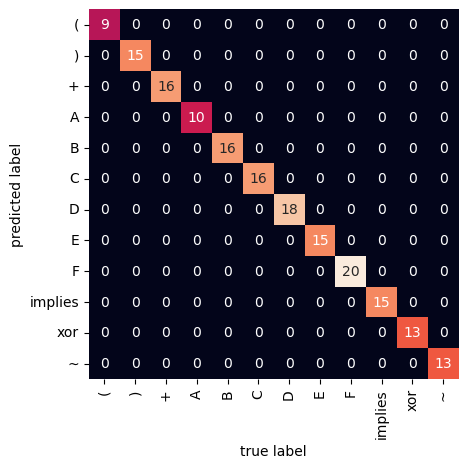

./0_1_symbols/ 0
./0_1_symbols/0 27
./0_1_symbols/1 27


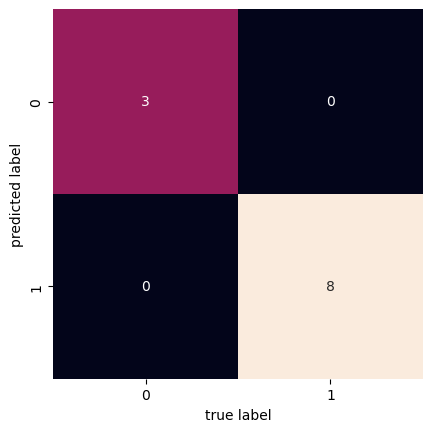

./letters_only_symbols/ 0
./letters_only_symbols/A 76
./letters_only_symbols/B 65
./letters_only_symbols/C 79
./letters_only_symbols/D 76
./letters_only_symbols/E 71
./letters_only_symbols/F 78


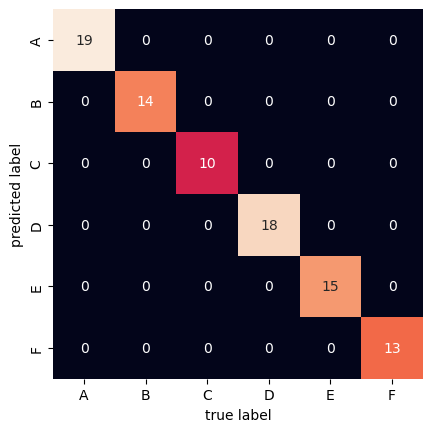

./E_F_symbols/ 0
./E_F_symbols/E 71
./E_F_symbols/F 78


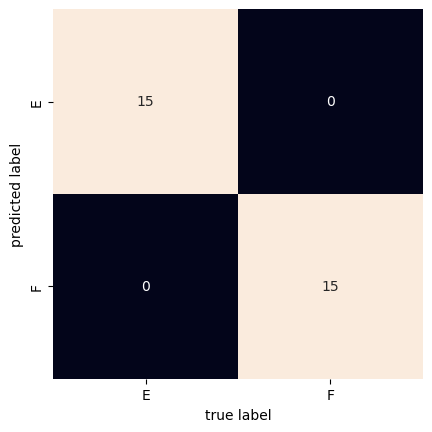

In [17]:
initialize_models(True)
load_models()

In [18]:
from tabular import tabular
import math

In [19]:
def solve_expression(img, is_table = False, showTrace = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img) 
        
        img = table_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        cells, col_num, row_num = box_extraction(img, showTrace)#, table= True)

        letters = [classify(i, is_letter=True, is_table=is_table) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True, is_table=is_table) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        
        if True:
            print(letters)
            print(numbers)
            print('cols numbers ' + str(col_num))
        
        
        solver = tabular.McCluskey()
        num_outputs = col_num-int(math.log(row_num-1,2))
        print(f"num_outputs: {num_outputs}")
        solver.solve(cells=numbers, num_col=col_num, num_outputs=num_outputs)

    else: 

        img = expression_preprocessing(img, showTrace)
        if showTrace:
            show_images([img])

        expression_rows = get_rows_number(img)
        
        if showTrace:
            show_images(expression_rows)
        expressions = [classify(i, is_expression=True, verbose=showTrace) for i in expression_rows ]
        
        if showTrace: print(expressions)
        result = []
        for ex in expressions:
            try:
                ex[1] ='='
                result.append(get_table(ex))
            except:
                result.append('error')
        
        for r in result:
            print(r)

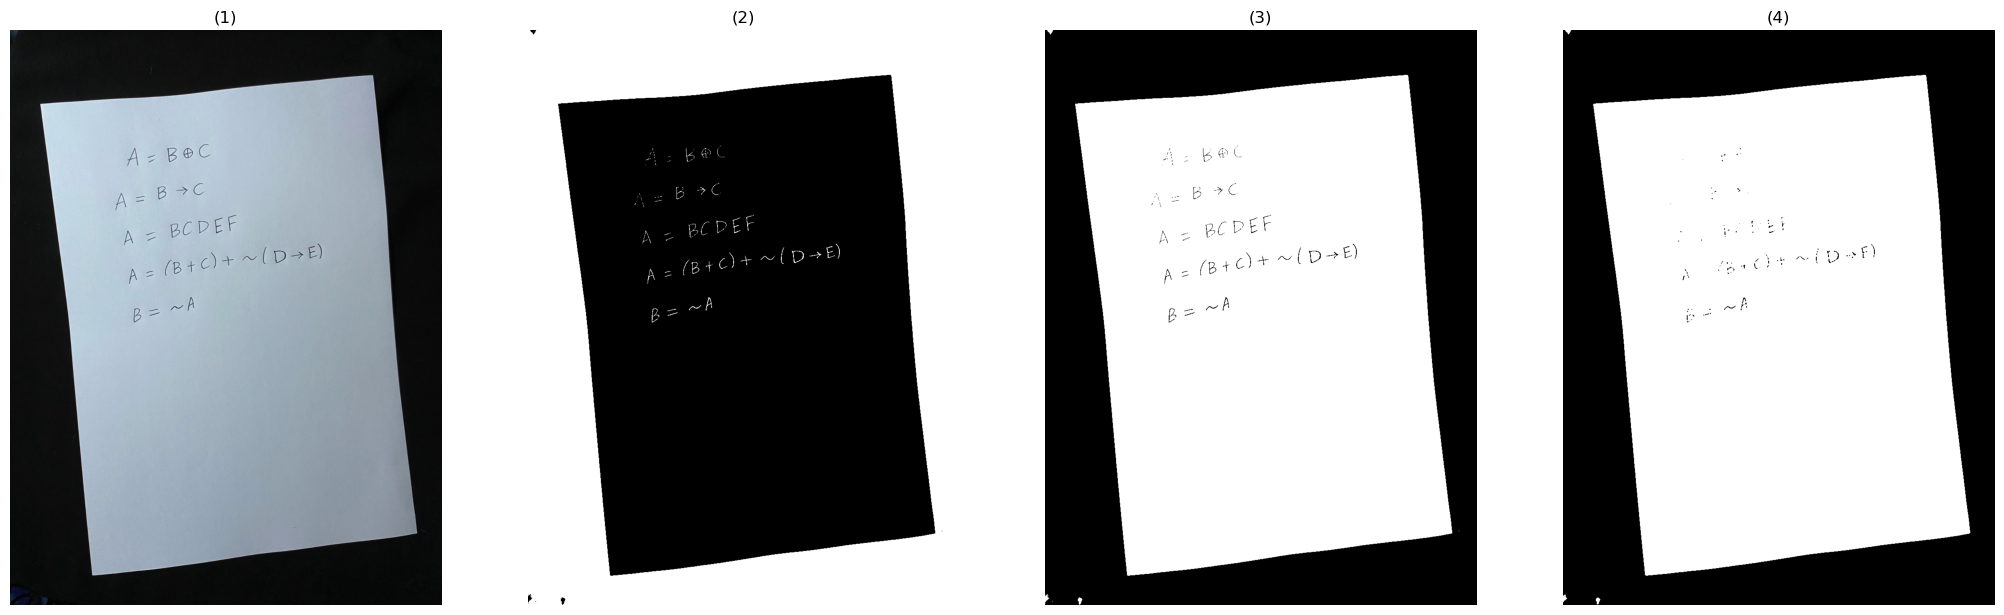

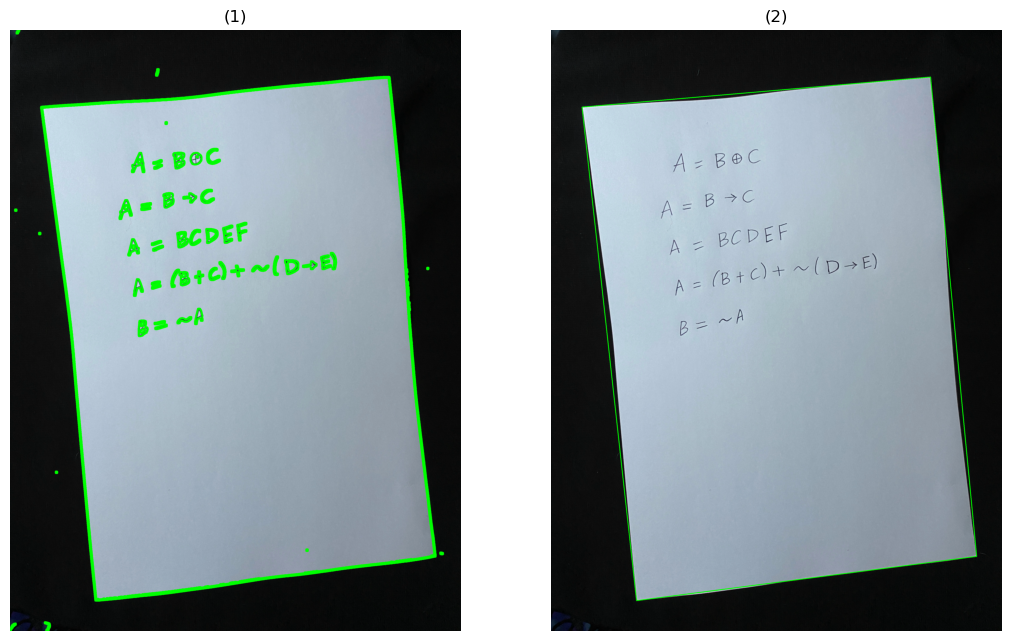

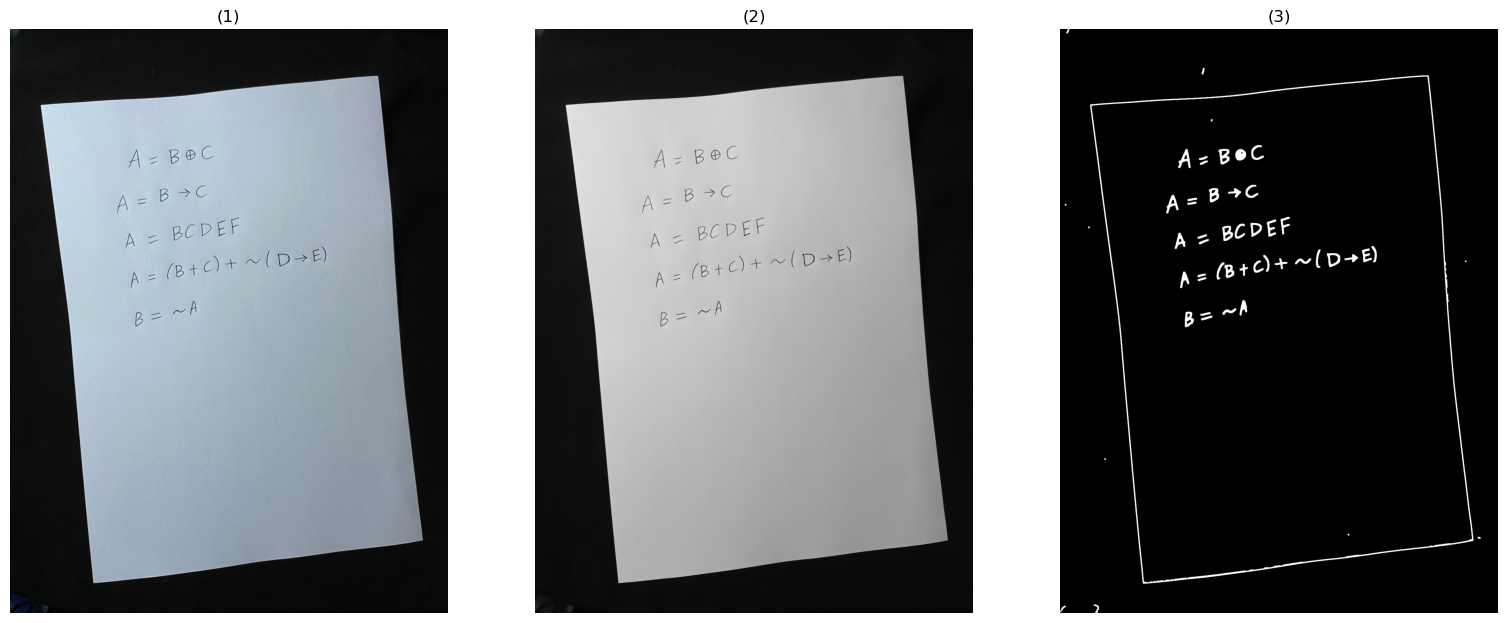

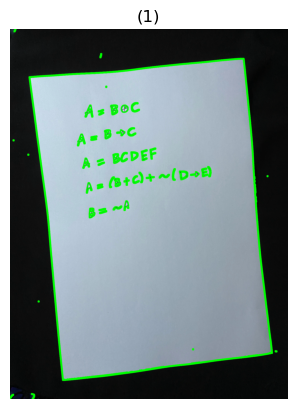

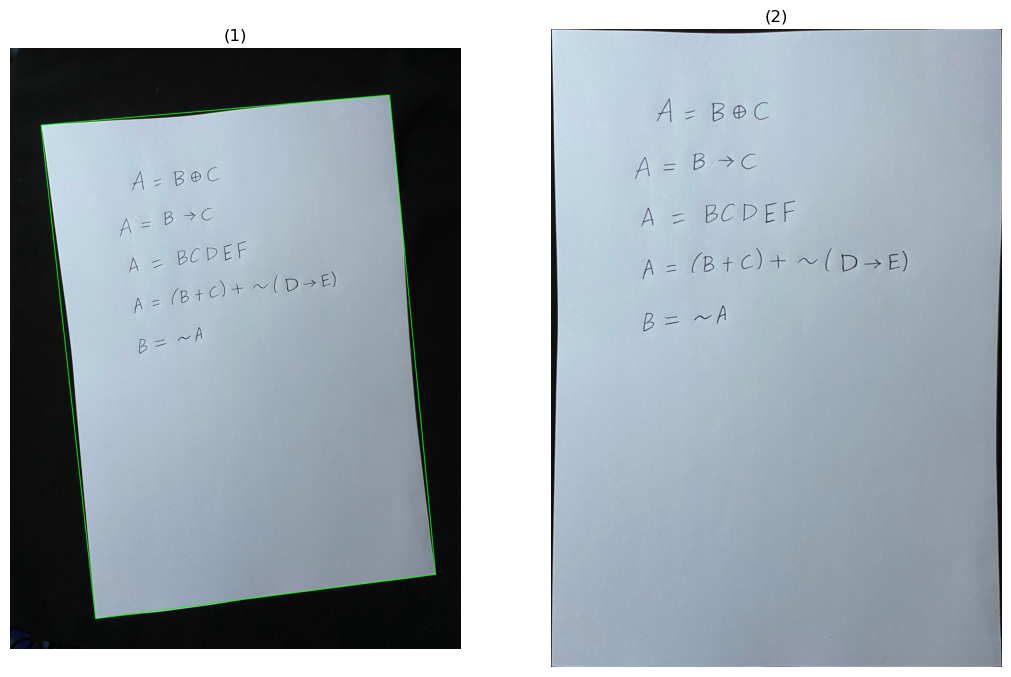

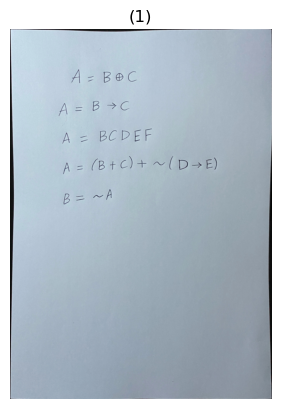

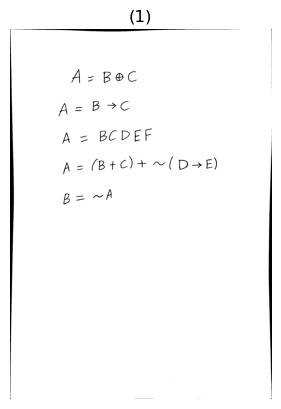

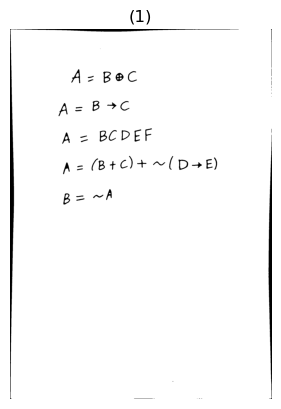

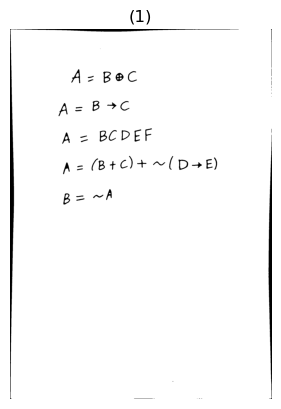

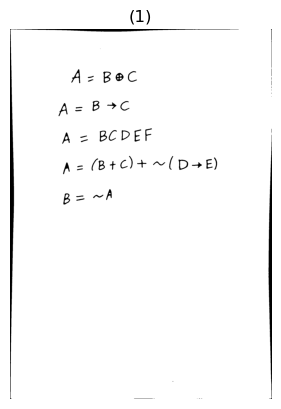

img shape: (2685, 1899), max=255, min=0,median=255.0 and type uint8
tolerance: 94.95


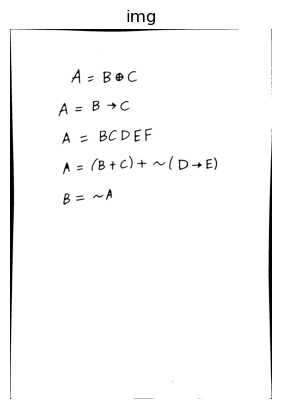

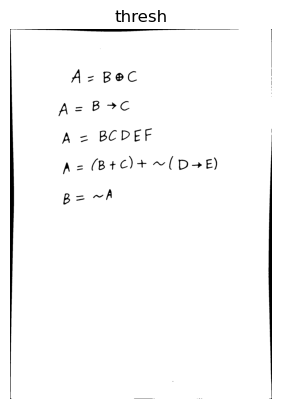

contours before area filtering
22.0, -522.0, 492.0, 401.5, 743.5, -393.0, 2777.0, -70.0, 1509.5, 336.0, -463.5, 322.0, 1564.5, 1005.5, 824.0, -384.5, 802.5, -2123.5, 2517.5, 942.5, 939.5, 4040.0, 1410.5, 815.0, 830.5, 859.5, 792.0, 419.0, -652.5, -319.5, 391.5, 1979.5, -692.5, -1634.0, 3292.0, 3148.0, 1135.0, 1580.5, 1326.0, 393.0, 388.5, -472.5, -629.0, 2267.0, 1030.5, -446.0, 1181.0, 2965.5, 313.0, -70.0, -566.0, -142.0, 350.0, -118.5, -145.5, 2587.0, -416.5, -758.5, 3480.5, 1275.5, 2496.5, 8.0, -5007816.5, 
average_area 1332.25
max_width 90
max_height 105
contours after area filtering
6566, 4845, 4400, 4233, 7035, 588, 663, 756, 1197, 690, 602, 969, 1188, 810, 738, 4550, 4004, 2002, 3528, 4536, 4872, 3402, 3500, 4740, 2925, 3599, 4828, 3575, 4650, 5293, 2604, 4590, 4140, 4700, 2790, 3131, 5467, 3225, 3528, 2275, 
masks


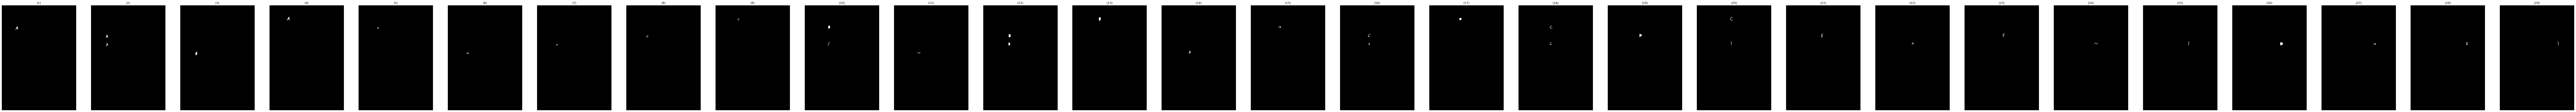

contours after merging


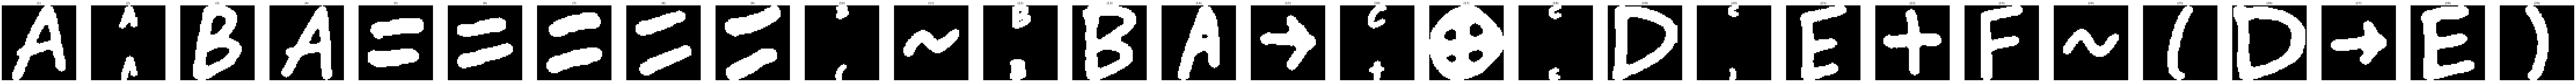

[array(['A', ')', 'B', 'A', '+', 'implies', 'D', 'D', 'D', '~', '~', '+',
       'B', 'A', '+', '~', 'D', '~', 'D', '~', 'E', '+', 'F', '~', '(',
       'D', 'implies', 'E', ')'], dtype='<U7')]
B and A or implies D and D and D and ~ ~ or B and A or ~ D and ~ D and ~ E or F and ~ ( D implies E ) 


TypeError: unhashable type: 'list'

In [27]:
# image = cv2.imread("./test_images/ex2.jpg") # TEST R
# image = cv2.imread("./test_images/ex1.jpg")
# image = cv2.imread("./test_images/t2.jpg") # TEST R
# image = cv2.imread("./test_images/exs/t29.jpg") # TEST R
image = cv2.imread("./test_images/final_test_2.jpg") # TEST R

result = solve_expression(image, is_table=False, showTrace=True)




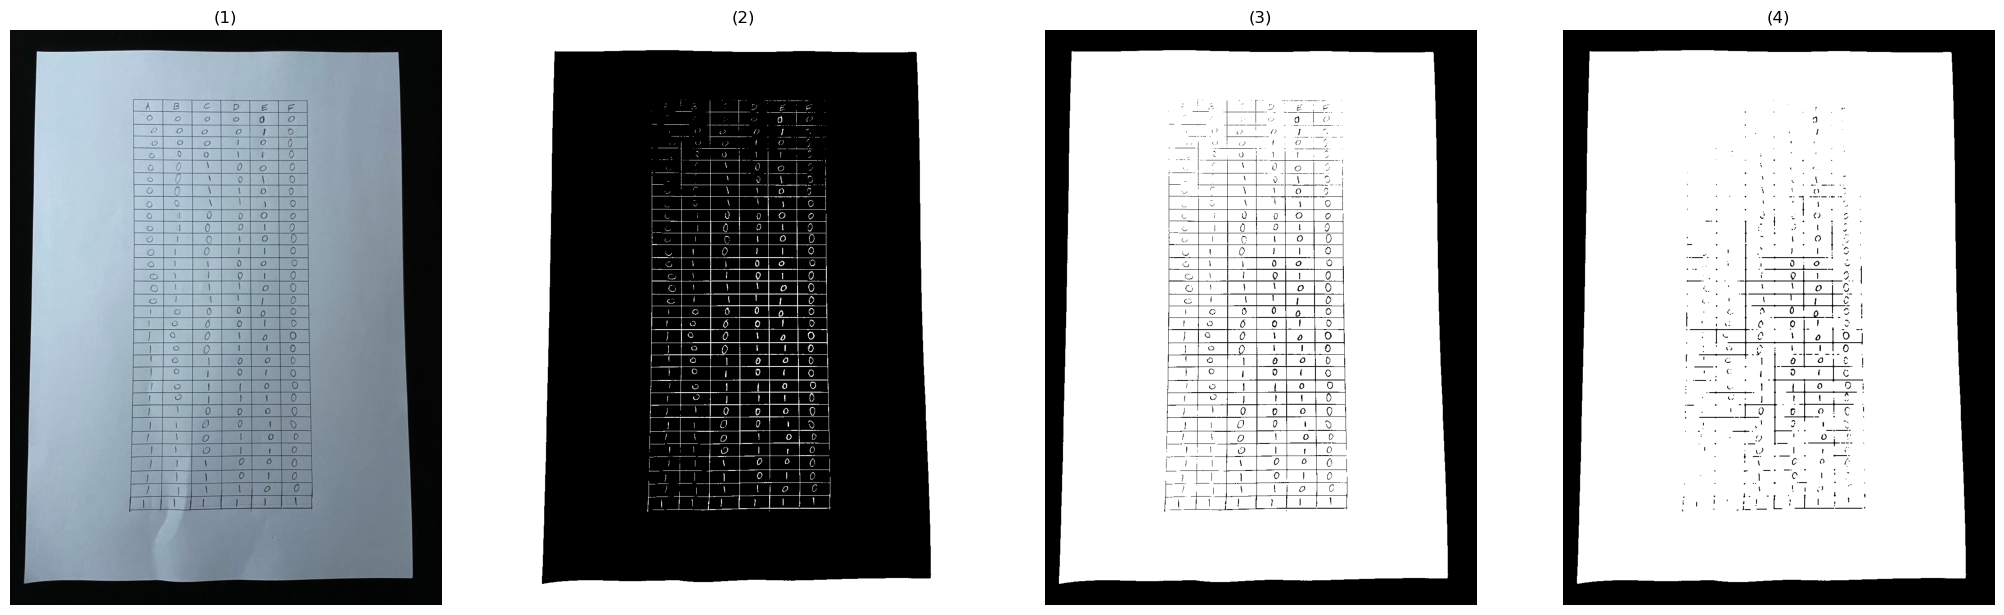

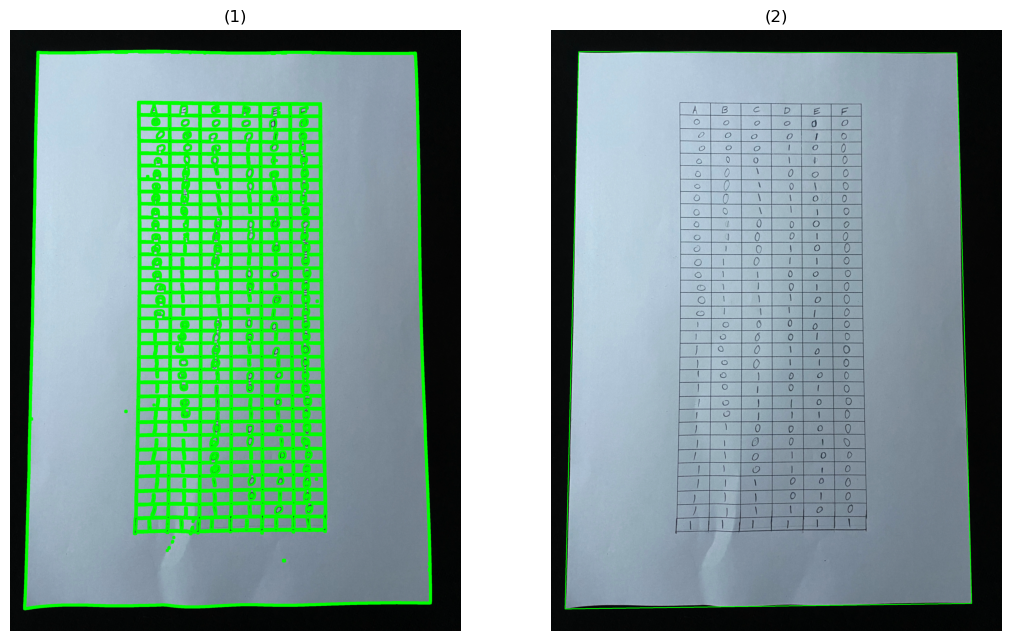

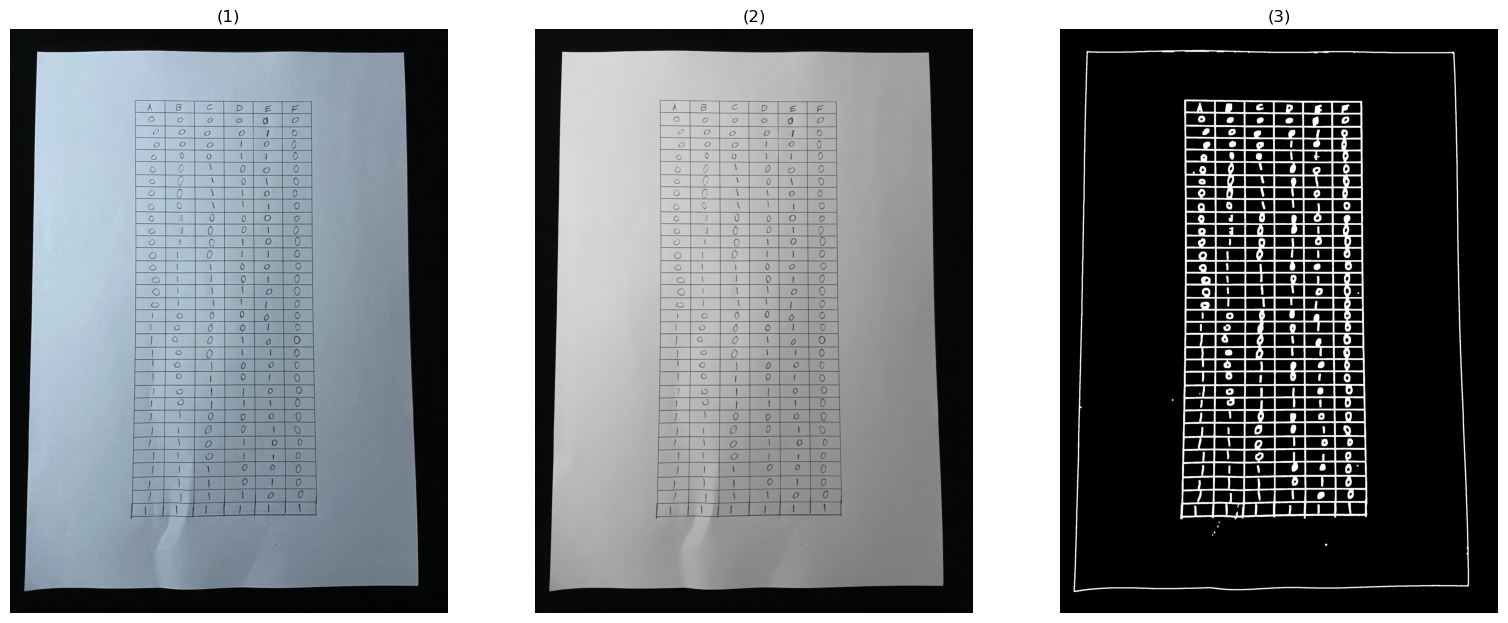

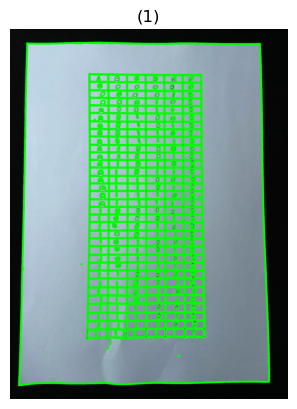

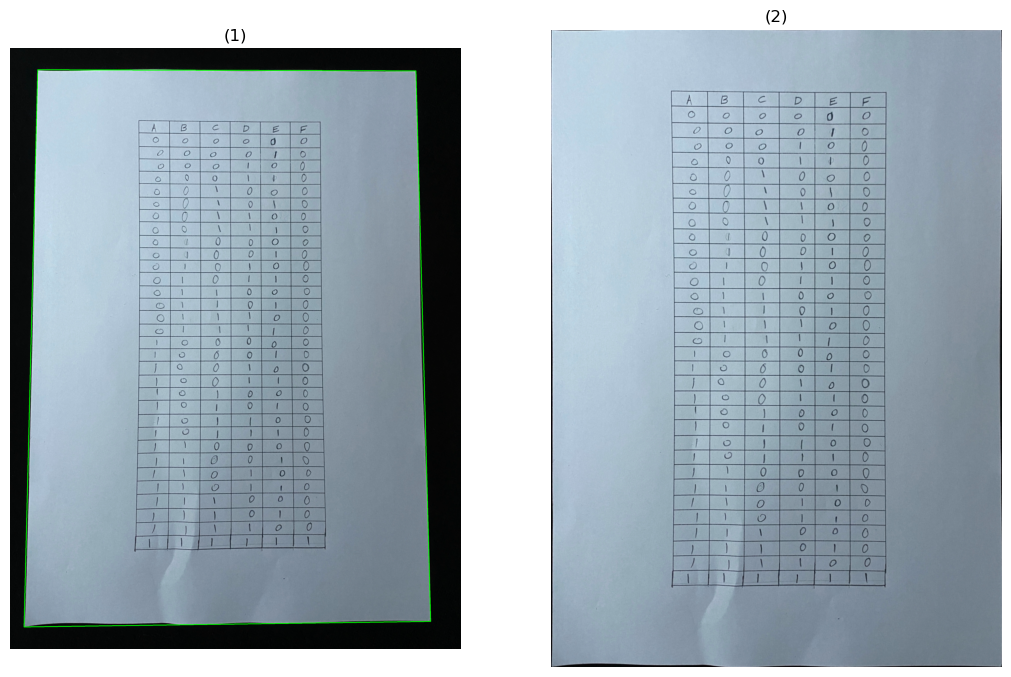

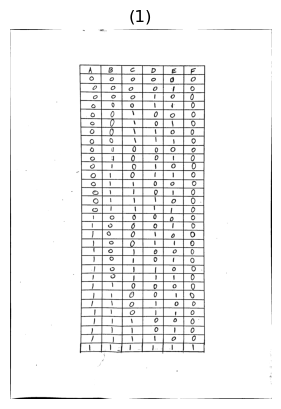

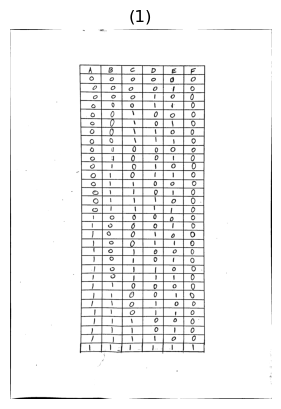

LEN 198
count rows 33
198
6 33


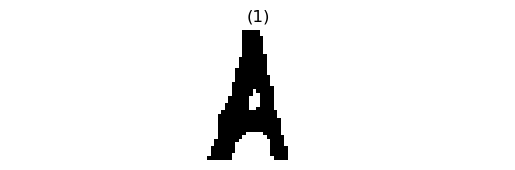

141 2207
37 3120


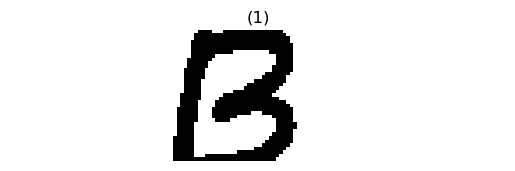

140 2207
37 3120


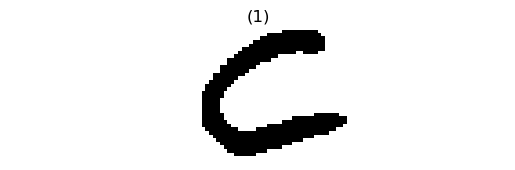

137 2207
36 3120


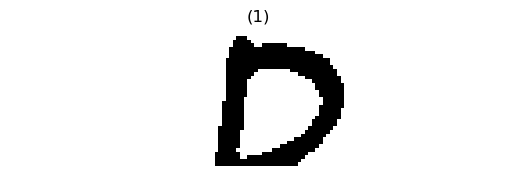

138 2207
38 3120


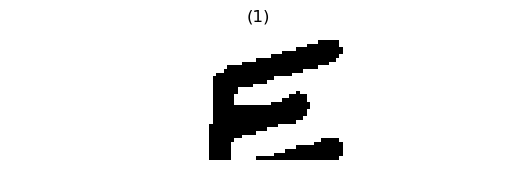

137 2207
36 3120


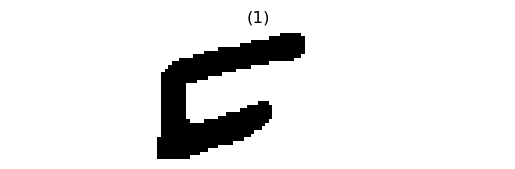

138 2207
36 3120


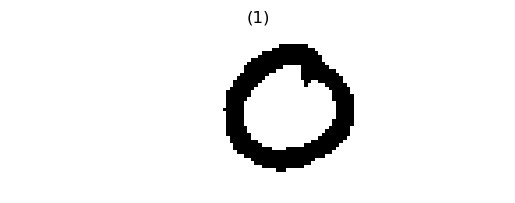

140 2207
46 3120


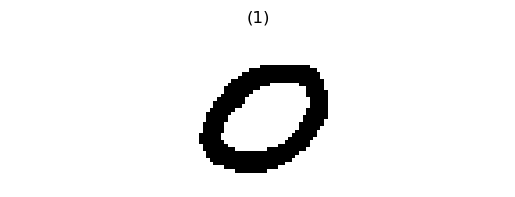

139 2207
44 3120


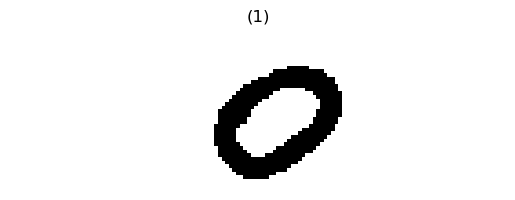

136 2207
44 3120


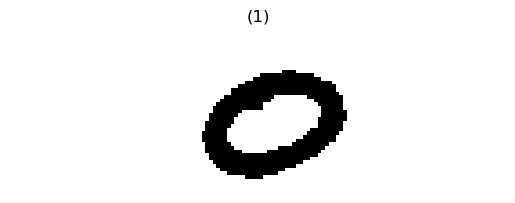

137 2207
45 3120


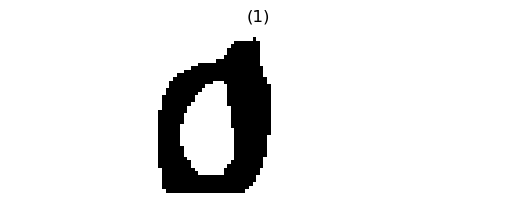

137 2207
45 3120


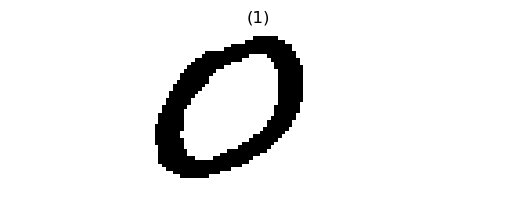

137 2207
44 3120


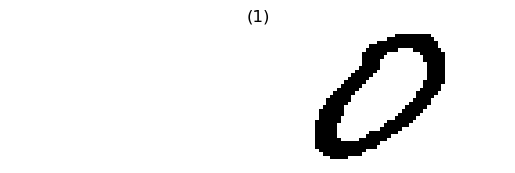

138 2207
37 3120


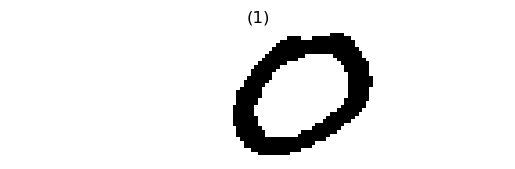

138 2207
36 3120


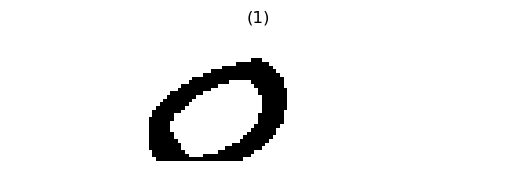

136 2207
36 3120


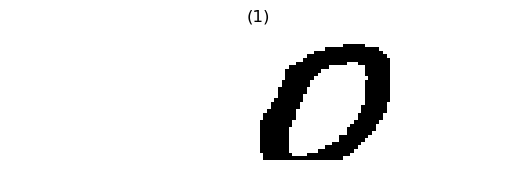

137 2207
36 3120


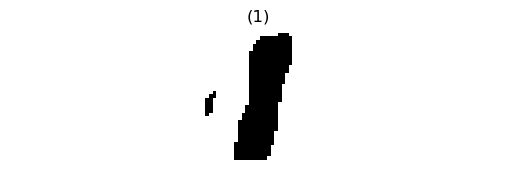

137 2207
36 3120


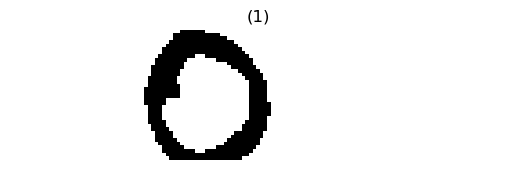

137 2207
36 3120


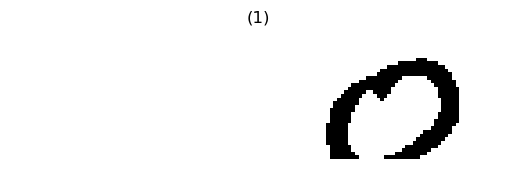

138 2207
36 3120


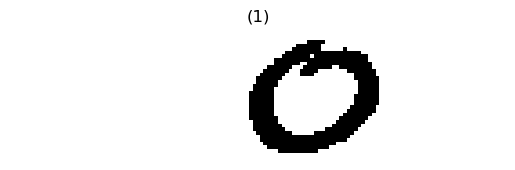

137 2207
36 3120


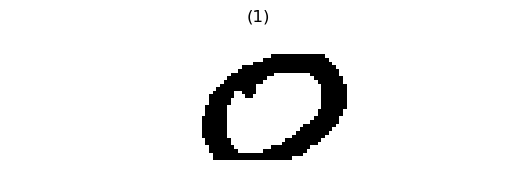

137 2207
36 3120


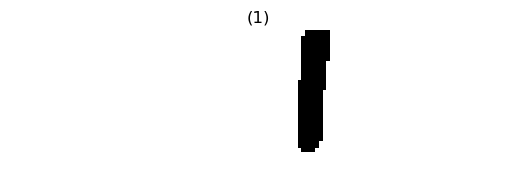

138 2207
36 3120


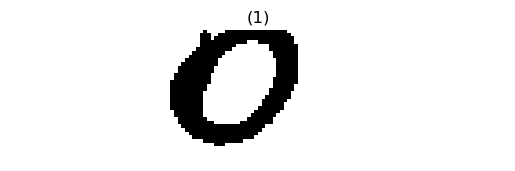

136 2207
36 3120


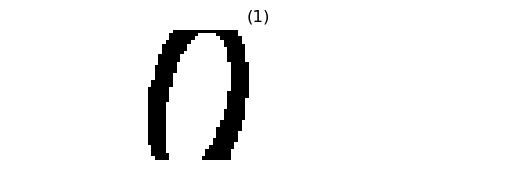

137 2207
36 3120


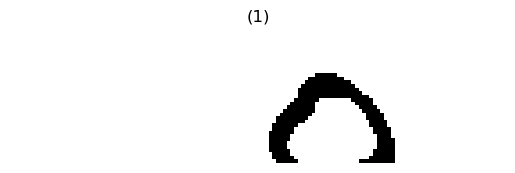

138 2207
37 3120


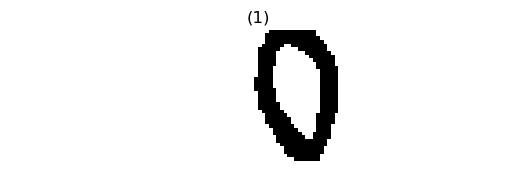

136 2207
36 3120


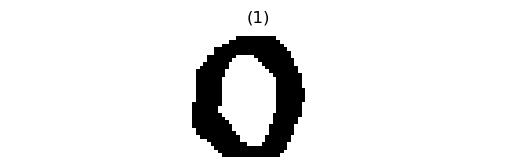

136 2207
35 3120


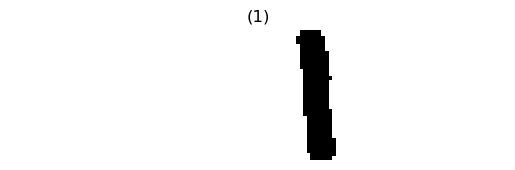

137 2207
36 3120


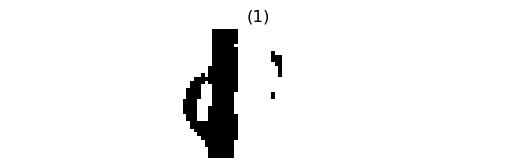

135 2207
35 3120


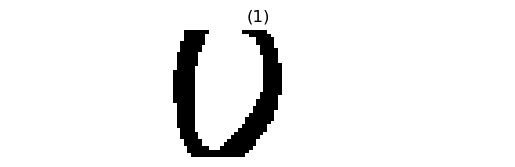

137 2207
35 3120


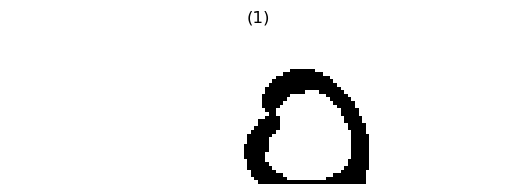

138 2207
43 3120


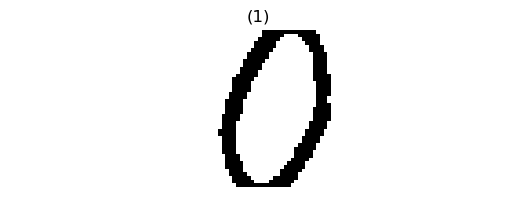

136 2207
43 3120


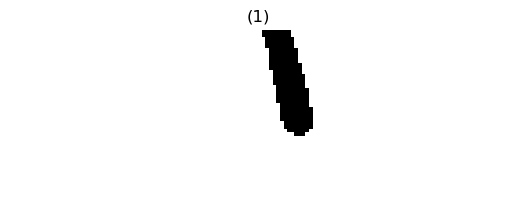

136 2207
43 3120


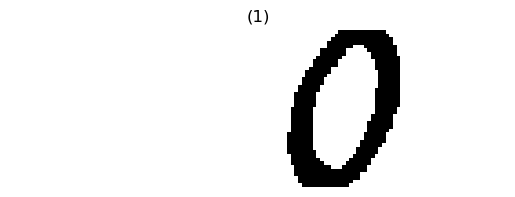

136 2207
43 3120


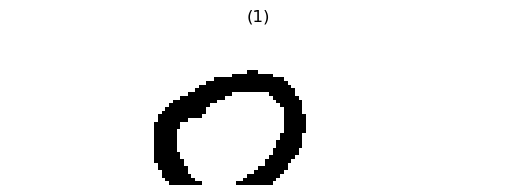

134 2207
42 3120


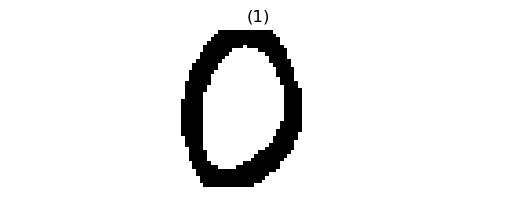

136 2207
43 3120


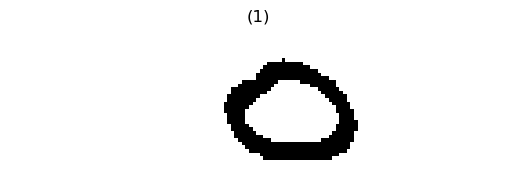

137 2207
36 3120


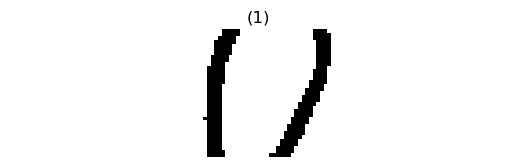

136 2207
35 3120


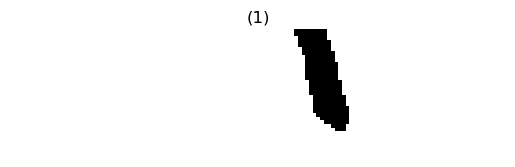

136 2207
35 3120


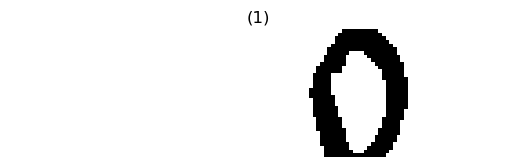

136 2207
35 3120


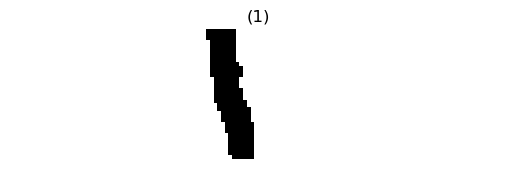

134 2207
35 3120


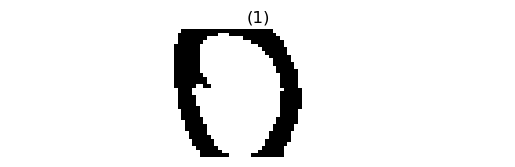

136 2207
35 3120


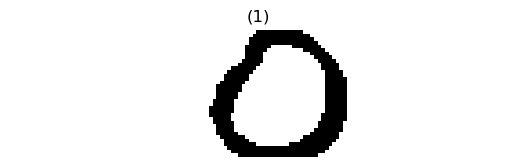

137 2207
35 3120


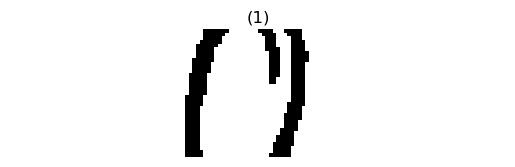

136 2207
35 3120


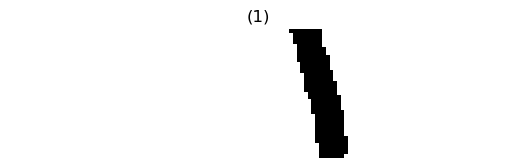

135 2207
35 3120


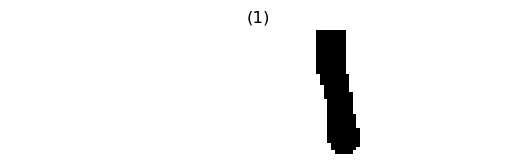

136 2207
34 3120


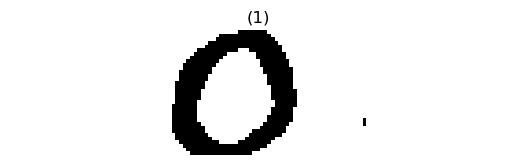

135 2207
34 3120


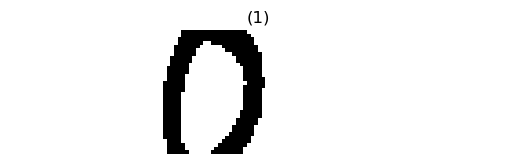

136 2207
34 3120


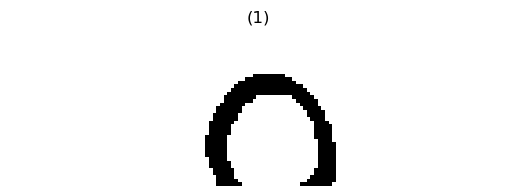

137 2207
43 3120


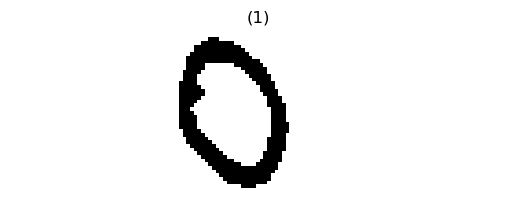

135 2207
43 3120


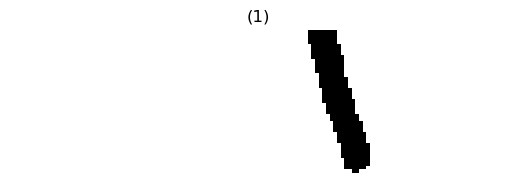

135 2207
42 3120


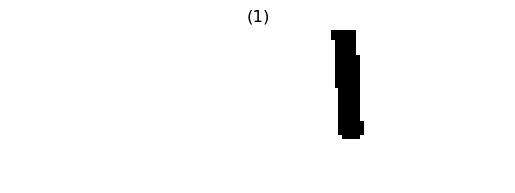

136 2207
42 3120


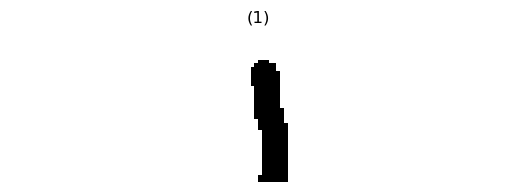

134 2207
41 3120


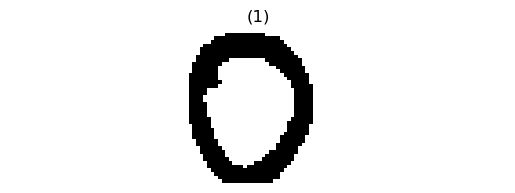

136 2207
42 3120


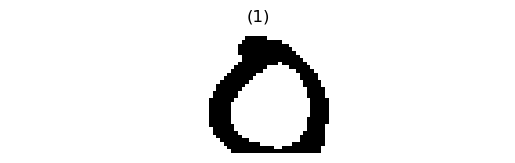

137 2207
34 3120


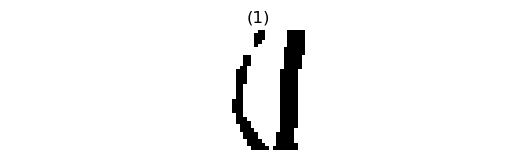

136 2207
33 3120


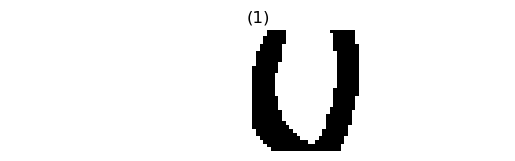

135 2207
33 3120


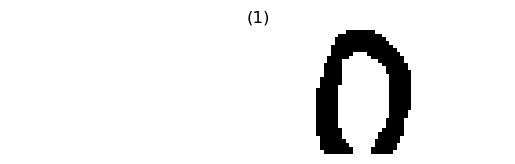

136 2207
34 3120


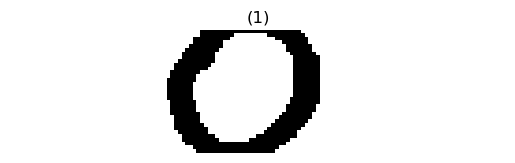

133 2207
33 3120


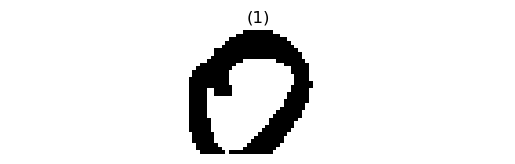

136 2207
34 3120


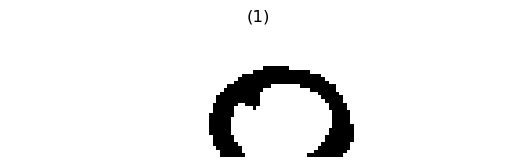

137 2207
35 3120


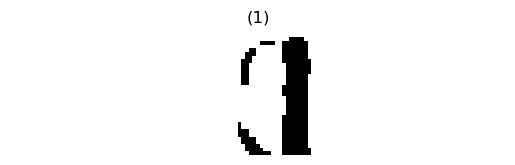

135 2207
34 3120


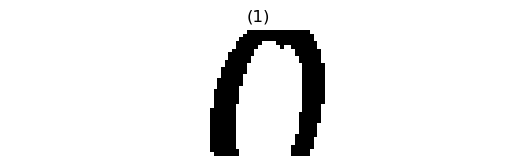

134 2207
34 3120


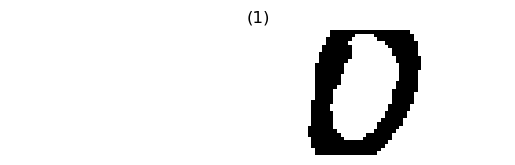

135 2207
34 3120


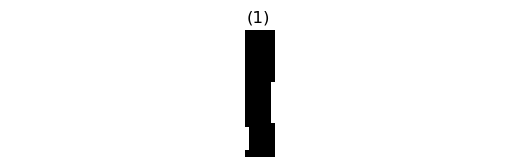

133 2207
34 3120


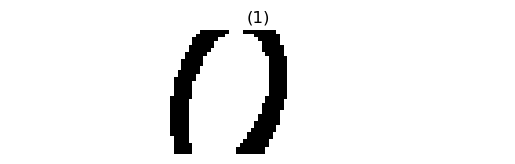

136 2207
34 3120


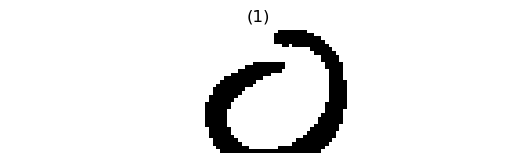

137 2207
34 3120


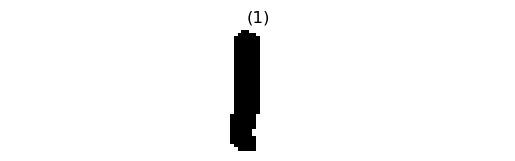

135 2207
33 3120


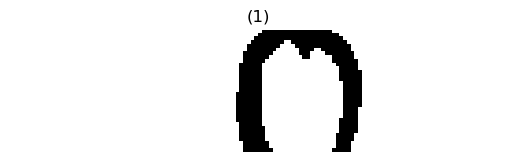

134 2207
33 3120


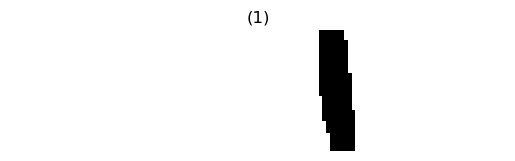

135 2207
33 3120


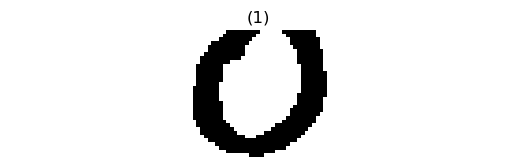

133 2207
34 3120


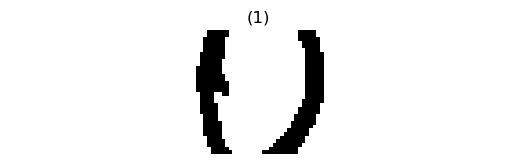

136 2207
34 3120


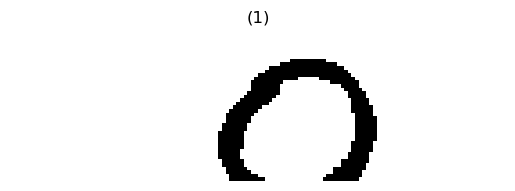

138 2207
42 3120


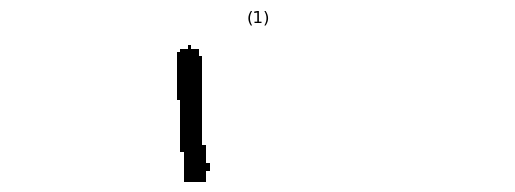

134 2207
41 3120


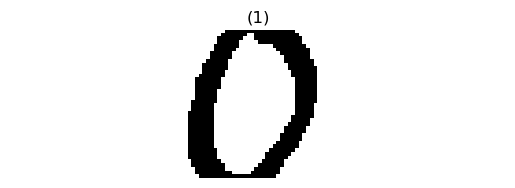

134 2207
40 3120


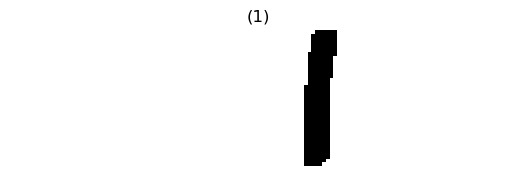

135 2207
40 3120


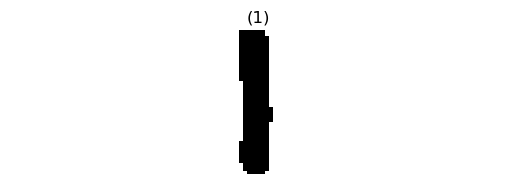

134 2207
40 3120


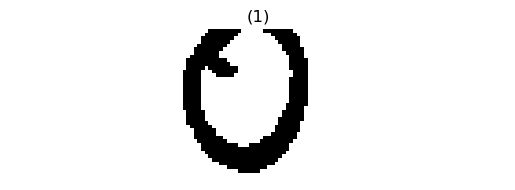

135 2207
41 3120


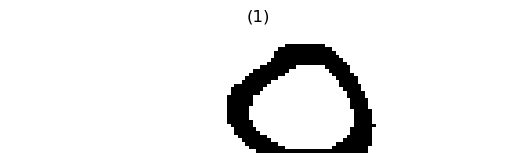

137 2207
34 3120


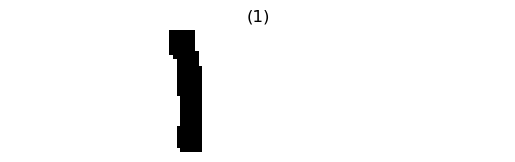

134 2207
33 3120


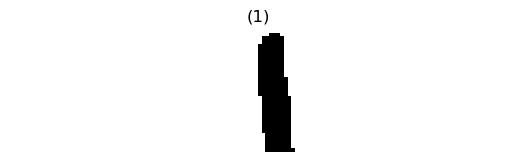

134 2207
33 3120


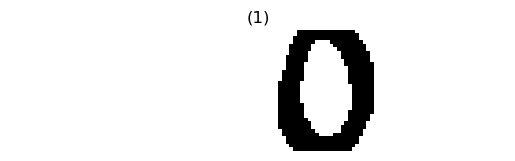

135 2207
33 3120


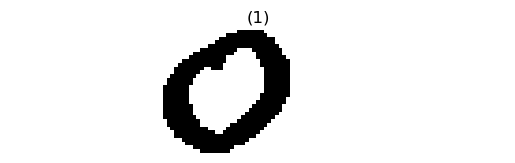

133 2207
33 3120


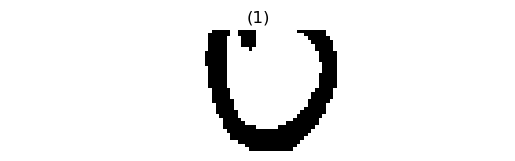

135 2207
33 3120


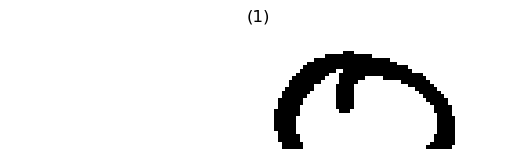

137 2207
33 3120


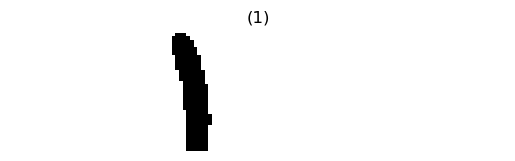

135 2207
33 3120


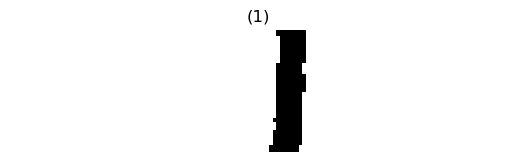

134 2207
33 3120


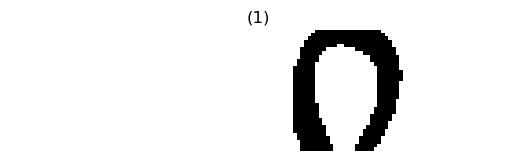

135 2207
33 3120


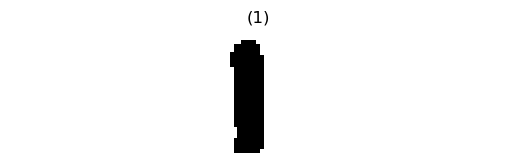

133 2207
33 3120


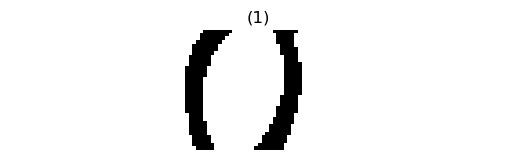

136 2207
33 3120


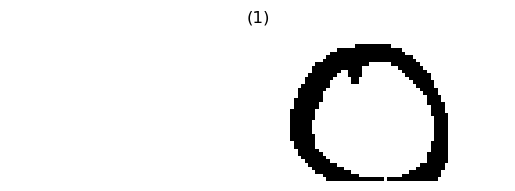

138 2207
42 3120


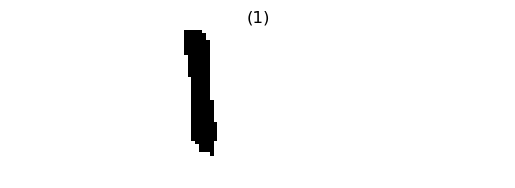

134 2207
40 3120


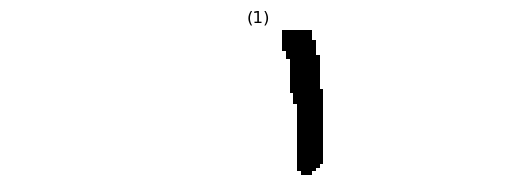

133 2207
40 3120


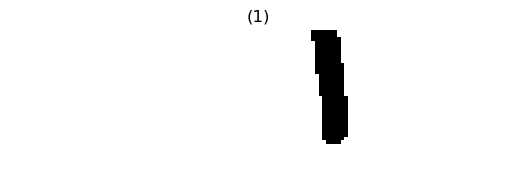

135 2207
40 3120


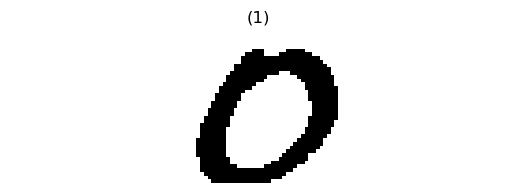

133 2207
41 3120


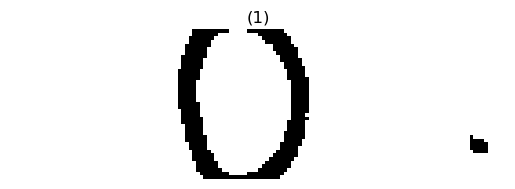

136 2207
41 3120


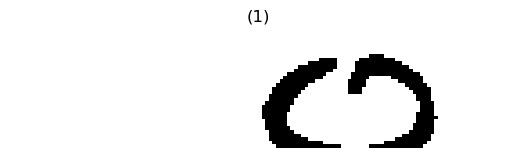

138 2207
33 3120


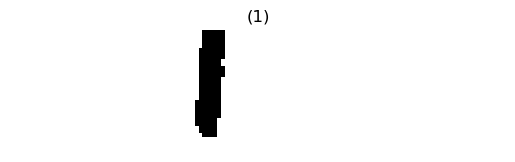

134 2207
33 3120


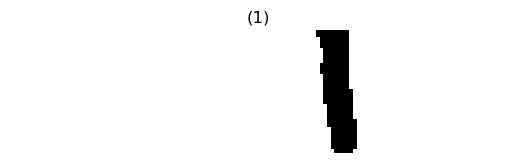

133 2207
33 3120


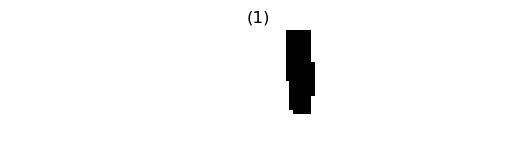

135 2207
33 3120


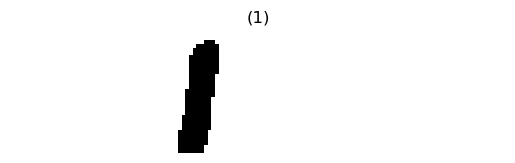

133 2207
33 3120


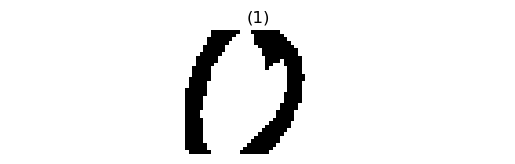

136 2207
34 3120


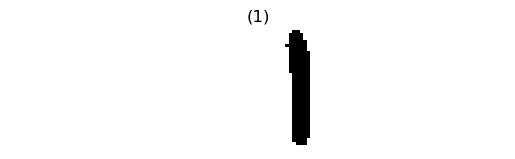

137 2207
33 3120


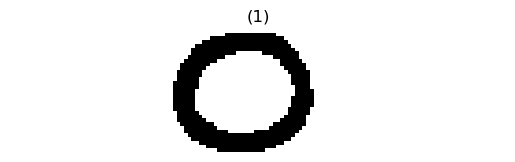

134 2207
33 3120


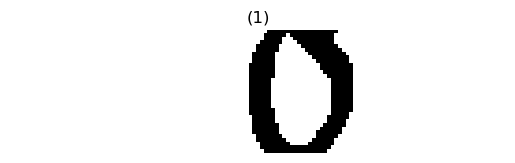

133 2207
33 3120


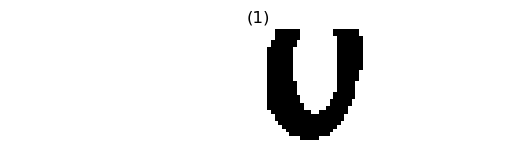

135 2207
32 3120


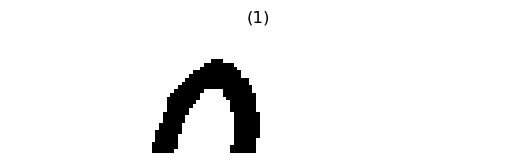

133 2207
33 3120


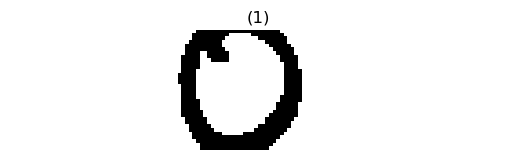

136 2207
33 3120


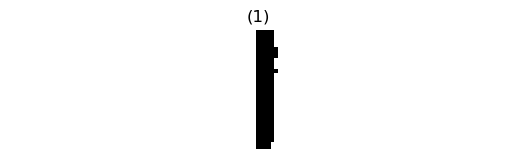

137 2207
33 3120


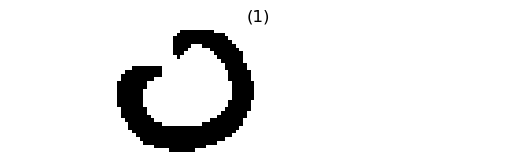

134 2207
33 3120


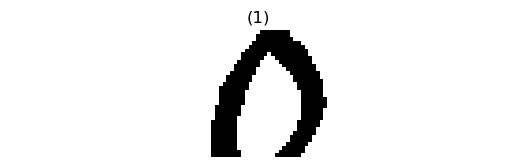

133 2207
34 3120


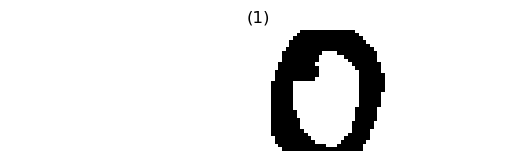

135 2207
33 3120


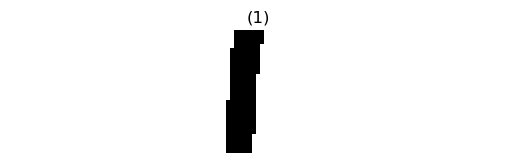

133 2207
33 3120


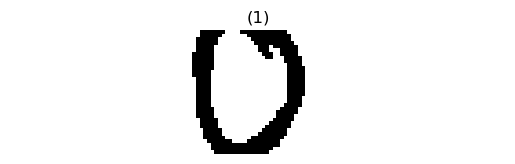

136 2207
34 3120


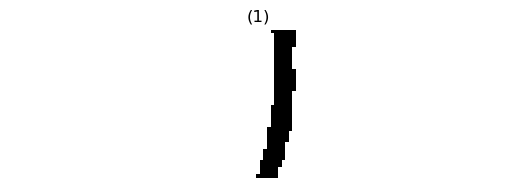

137 2207
41 3120


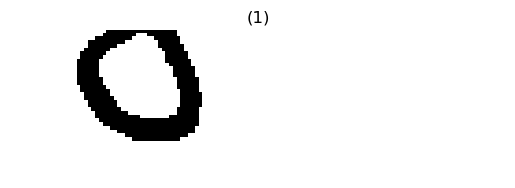

134 2207
40 3120


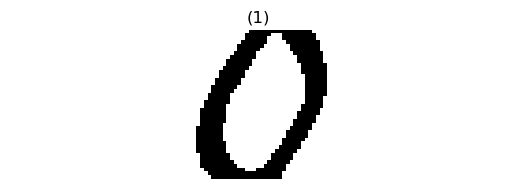

133 2207
40 3120


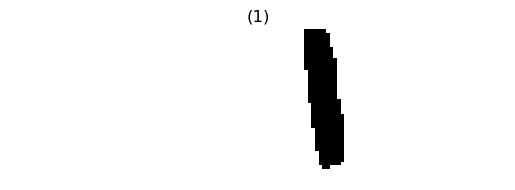

135 2207
41 3120


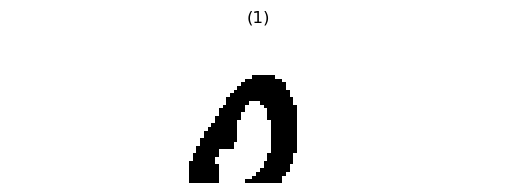

133 2207
41 3120


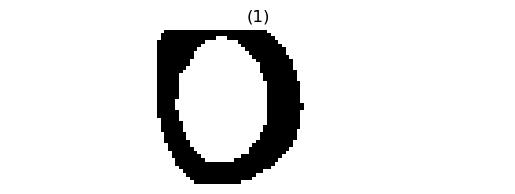

135 2207
42 3120


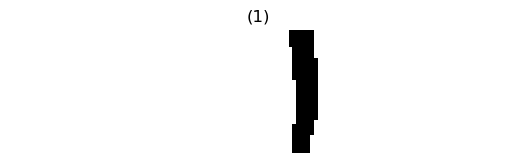

137 2207
34 3120


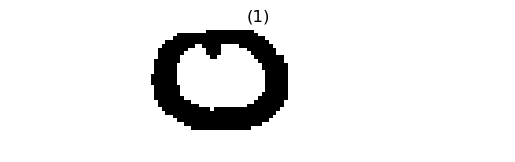

134 2207
33 3120


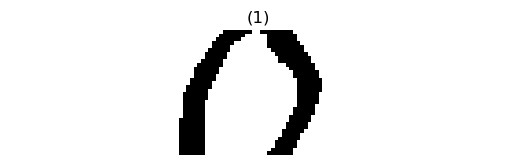

135 2207
34 3120


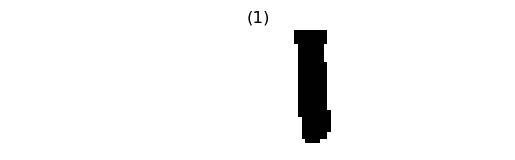

136 2207
33 3120


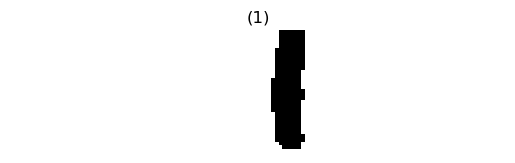

133 2207
33 3120


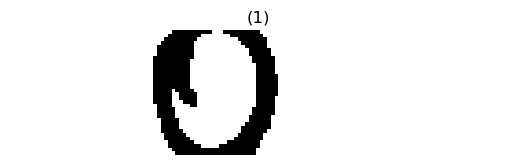

135 2207
34 3120


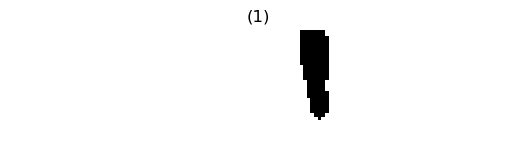

137 2207
34 3120


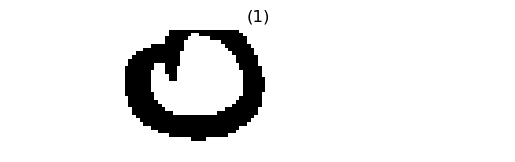

134 2207
33 3120


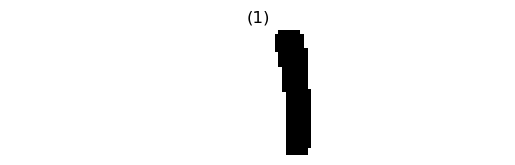

135 2207
34 3120


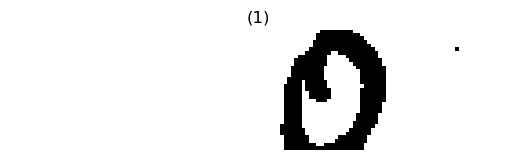

136 2207
33 3120


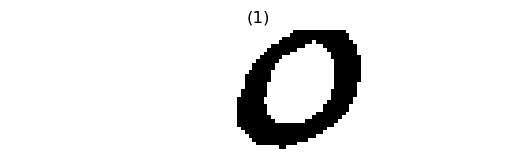

133 2207
33 3120


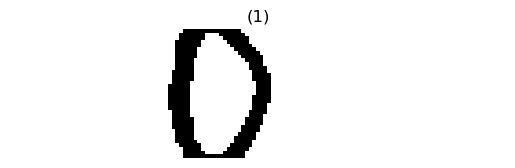

135 2207
35 3120


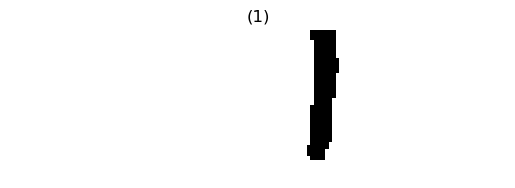

137 2207
41 3120


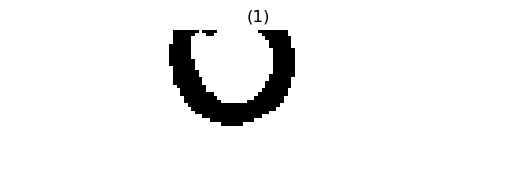

134 2207
42 3120


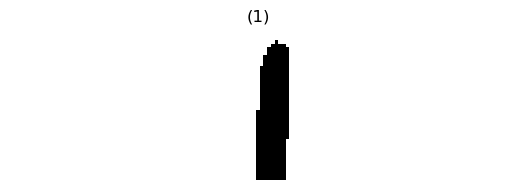

135 2207
41 3120


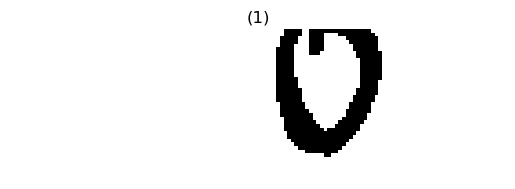

136 2207
41 3120


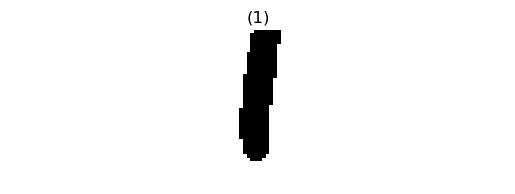

132 2207
41 3120


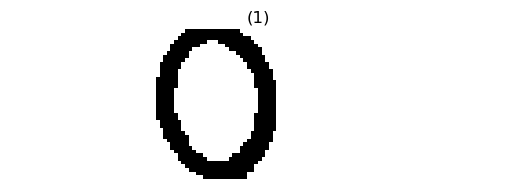

136 2207
41 3120


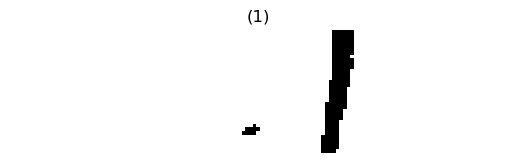

137 2207
34 3120


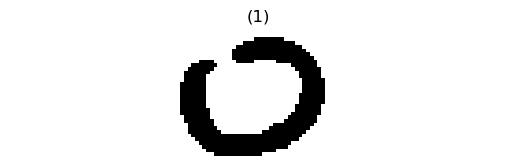

134 2207
34 3120


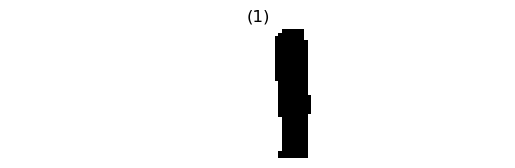

135 2207
35 3120


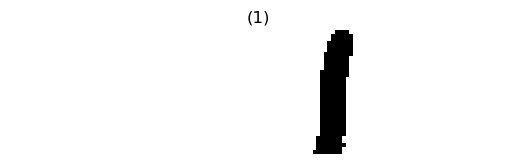

136 2207
34 3120


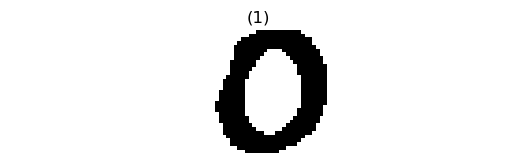

133 2207
34 3120


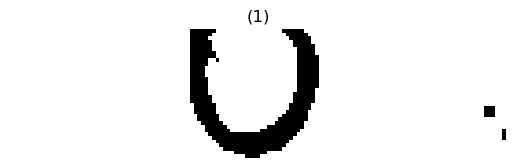

135 2207
35 3120


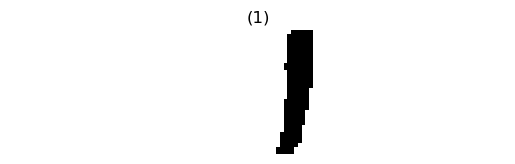

136 2207
34 3120


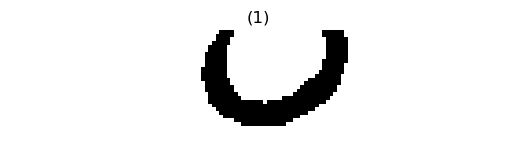

135 2207
34 3120


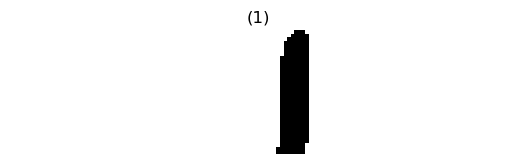

136 2207
34 3120


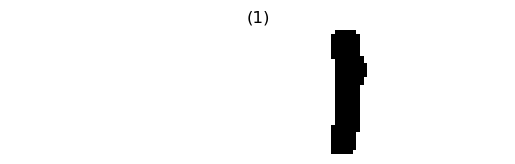

136 2207
34 3120


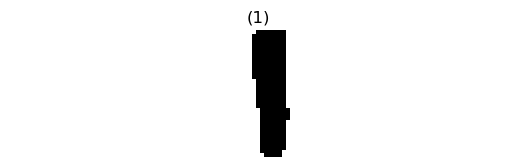

133 2207
34 3120


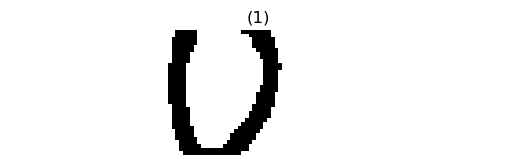

135 2207
34 3120


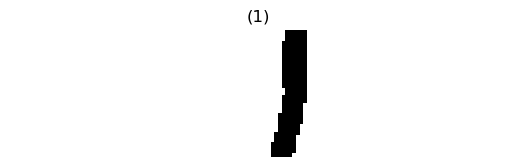

137 2207
35 3120


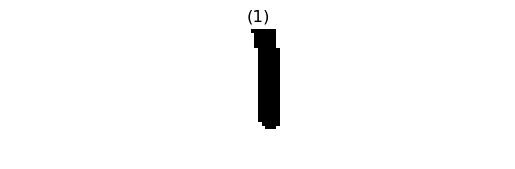

134 2207
35 3120


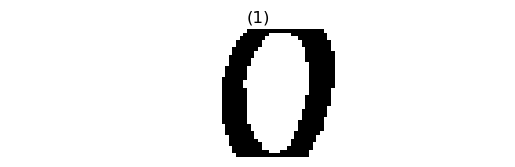

136 2207
35 3120


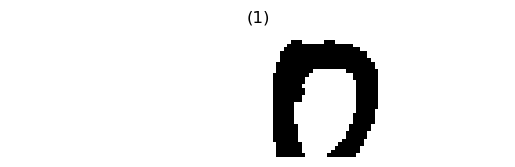

136 2207
35 3120


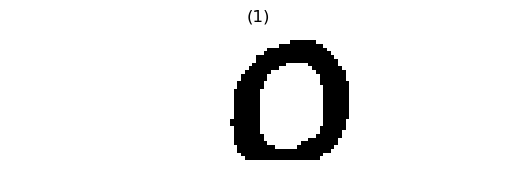

133 2207
35 3120


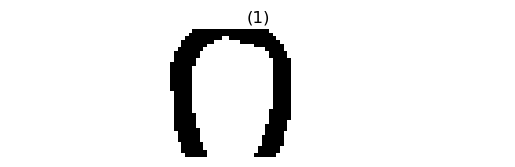

136 2207
35 3120


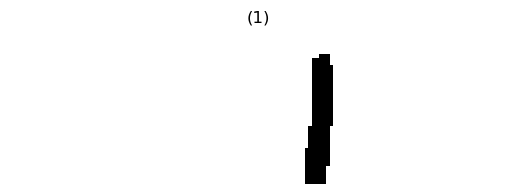

138 2207
43 3120


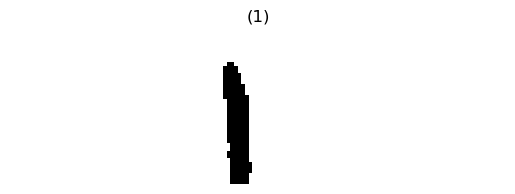

135 2207
42 3120


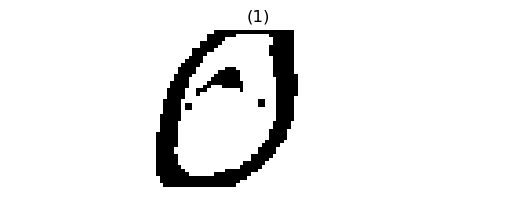

136 2207
43 3120


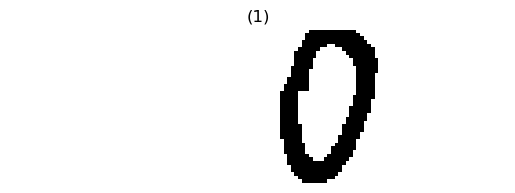

136 2207
42 3120


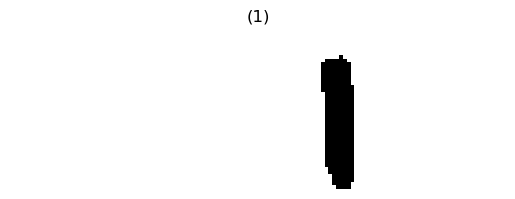

134 2207
43 3120


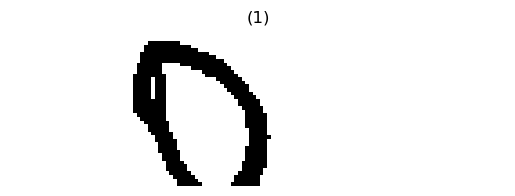

137 2207
43 3120


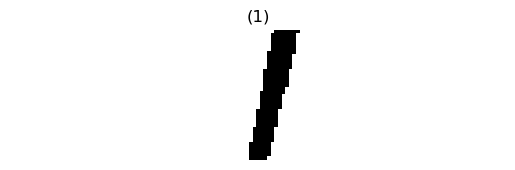

137 2207
36 3120


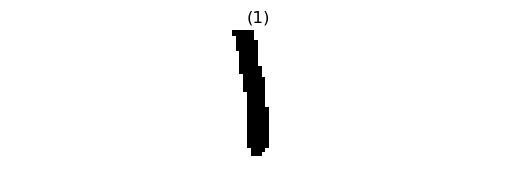

134 2207
36 3120


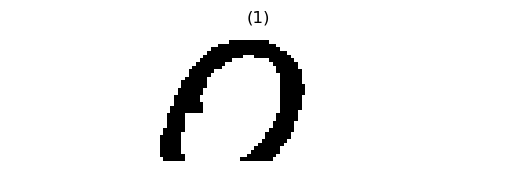

136 2207
36 3120


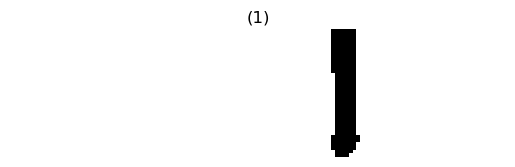

136 2207
35 3120


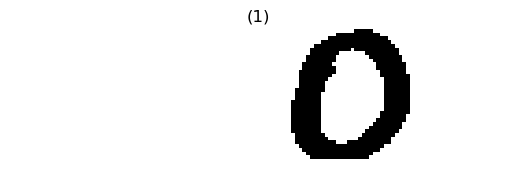

134 2207
35 3120


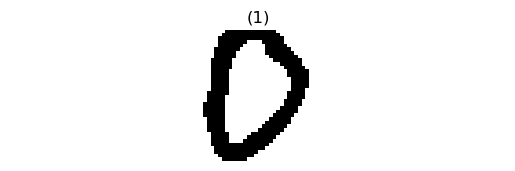

136 2207
36 3120


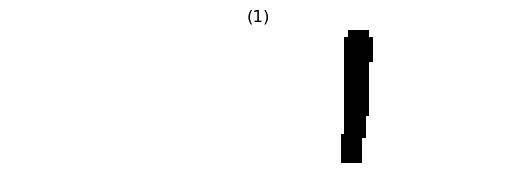

138 2207
37 3120


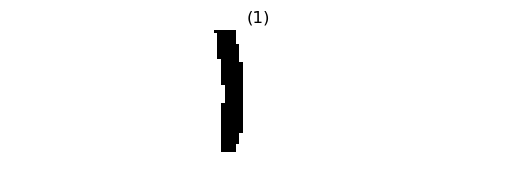

134 2207
36 3120


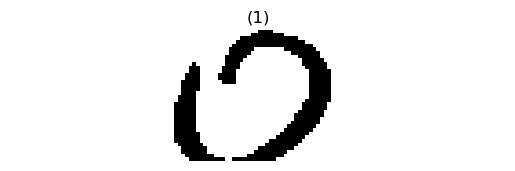

136 2207
36 3120


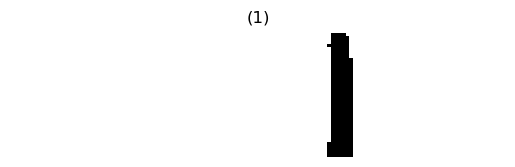

136 2207
35 3120


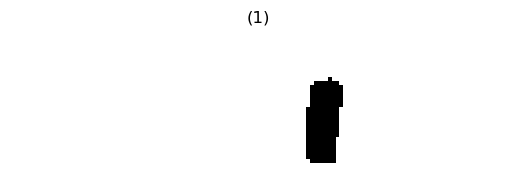

134 2207
36 3120


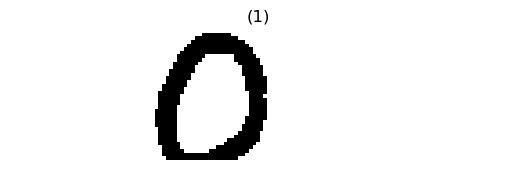

137 2207
36 3120


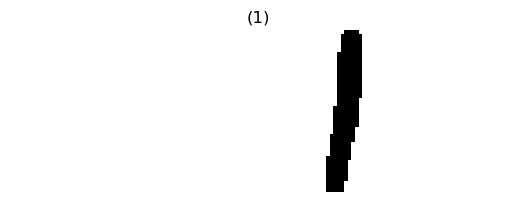

138 2207
45 3120


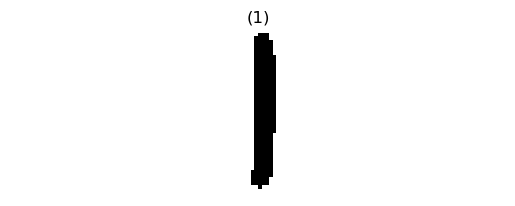

134 2207
45 3120


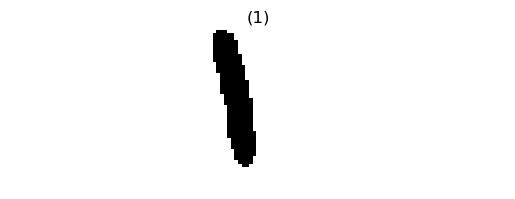

137 2207
44 3120


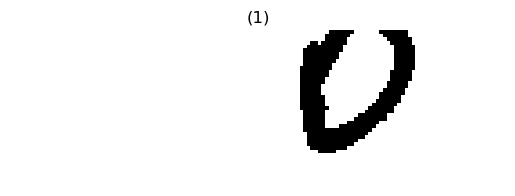

137 2207
43 3120


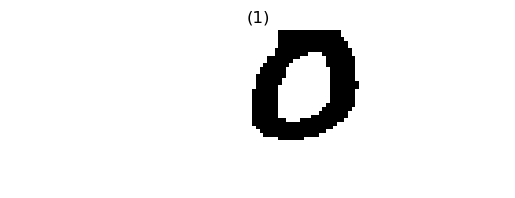

135 2207
43 3120


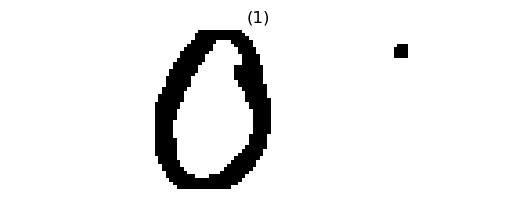

137 2207
44 3120


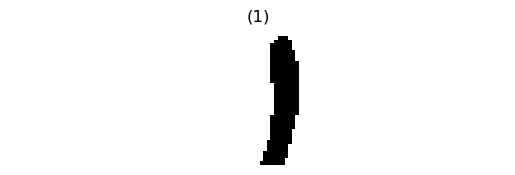

139 2207
38 3120


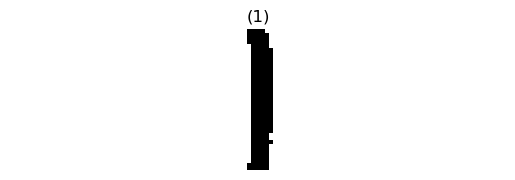

134 2207
38 3120


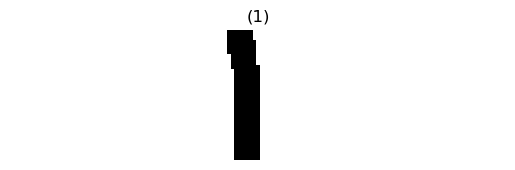

137 2207
36 3120


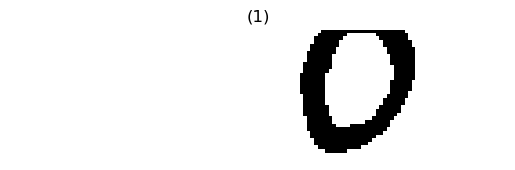

137 2207
36 3120


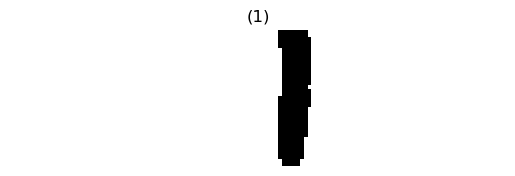

135 2207
37 3120


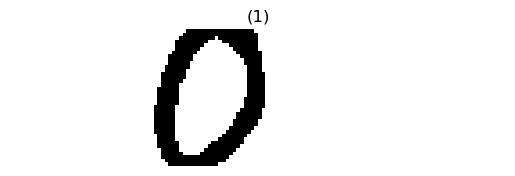

138 2207
38 3120


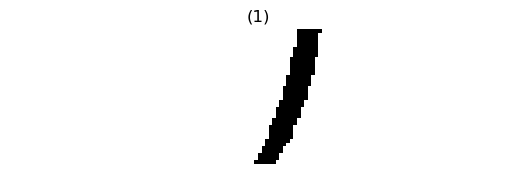

140 2207
38 3120


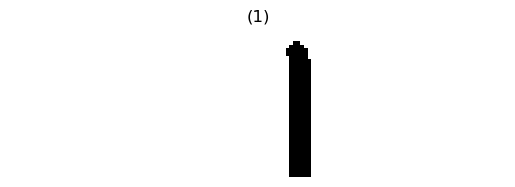

135 2207
40 3120


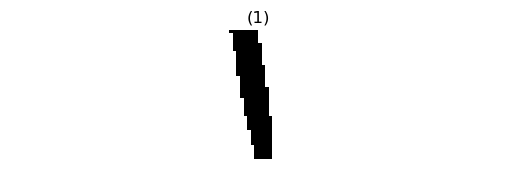

138 2207
36 3120


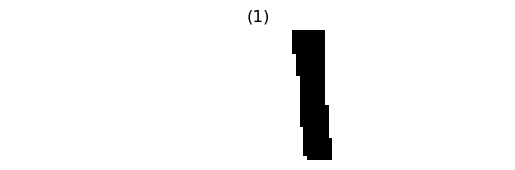

137 2207
36 3120


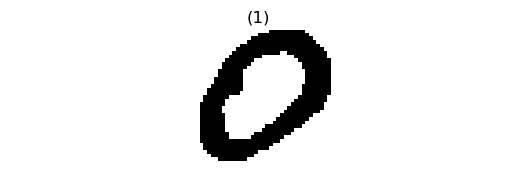

136 2207
36 3120


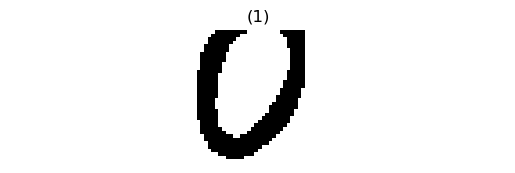

138 2207
37 3120


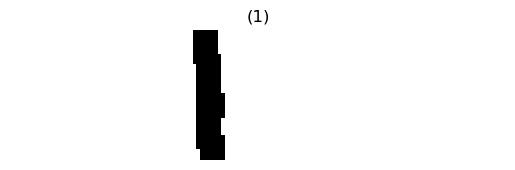

141 2207
37 3120


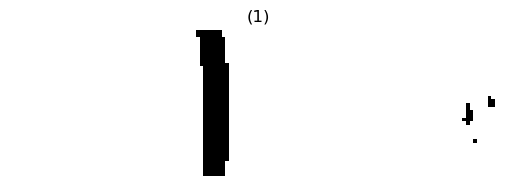

136 2207
40 3120


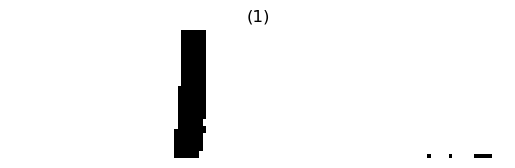

139 2207
36 3120


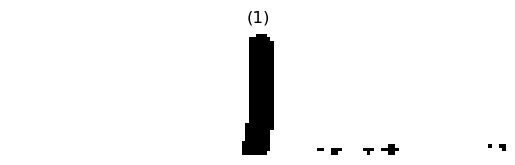

139 2207
35 3120


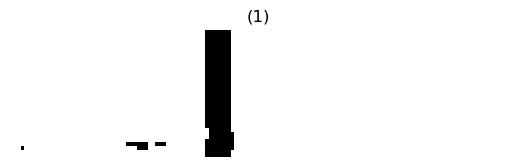

137 2207
35 3120


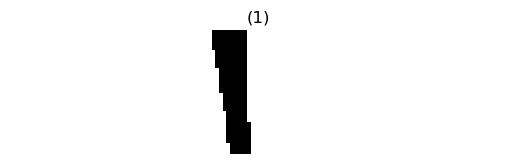

140 2207
35 3120
[array(['A'], dtype='<U1'), array(['F'], dtype='<U1'), array(['A'], dtype='<U1'), array(['A'], dtype='<U1'), array(['A'], dtype='<U1'), array(['F'], dtype='<U1')]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]
cols numbers 6
num_outputs: 1
F0 =  e  +  abd  +  a'b'd  +  a'cd'  +  bc'  +  ab'd'  +  c'd  +  

F0 =  e  +  abd  +  a'b'd  +  a'cd'  +  bc'  +  ab'd'  +  ac'  +  

F0 =  e  +  abd  +  a'b'd  +  a'cd'  +  bc'  +  ac'  +  b'cd'  +  

F0 =  e  

In [21]:
image = cv2.imread("./test_images/exs/t35.jpg") # TEST R
# image = cv2.imread("./test_images/table8.png") # TEST R

result = solve_expression(image, is_table=True, showTrace=True)